In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#metrics
from sklearn.metrics import mean_squared_error

#tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt,ExponentialSmoothing,SimpleExpSmoothing
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import month_plot

from sklearn.linear_model import LinearRegression

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [198]:
Rose=pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')

In [199]:
Rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [200]:
Rose.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [201]:
Rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [202]:
Rose.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


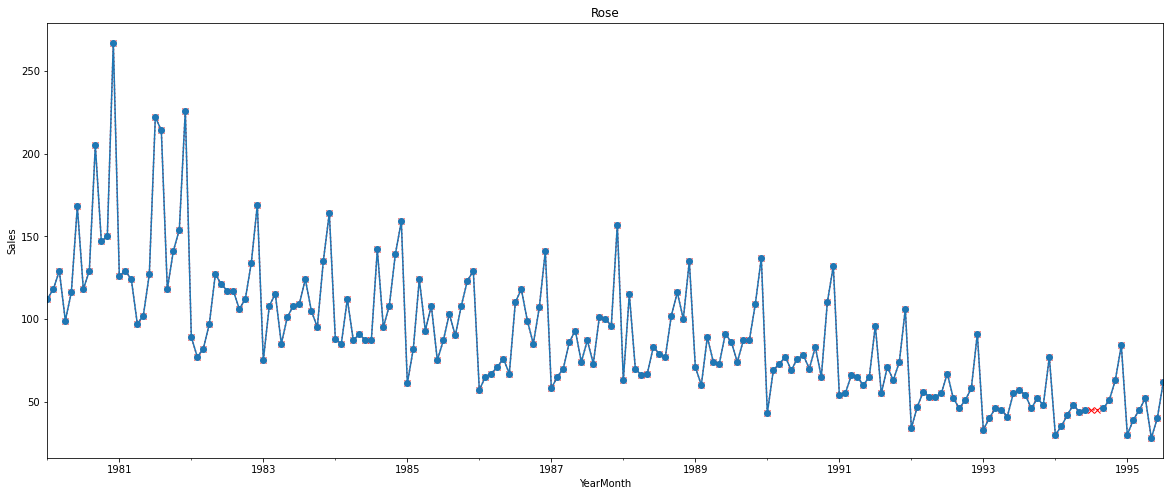

In [203]:
ffill_imputed = Rose.copy(deep=True)

ffill_imputed.fillna(method='ffill',inplace=True)

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Rose'].plot(color='r', marker='x', linestyle='dotted')

# Plot the airquality DataFrame with title
Rose['Rose'].plot(title='Rose', marker='o')

plt.ylabel('Sales')
plt.show()

Missing values= [0]


Text(0.5, 1.0, 'Rose')

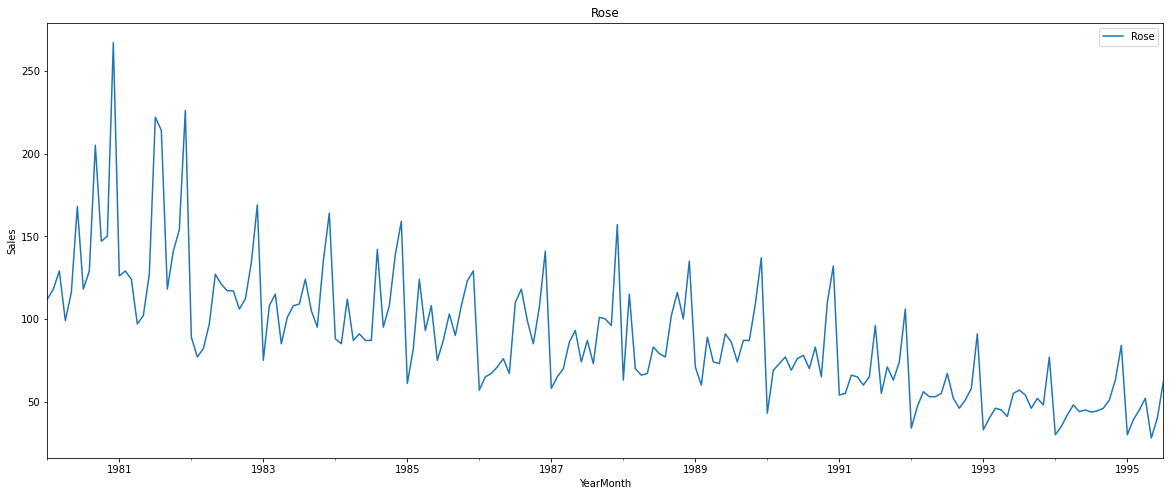

In [204]:
Rose.interpolate(method='spline',order=3,inplace=True)
Rose.plot()
print('Missing values=',Rose.isna().sum().values)
plt.ylabel('Sales')
plt.title('Rose')

Text(0.5, 1.0, 'Rose')

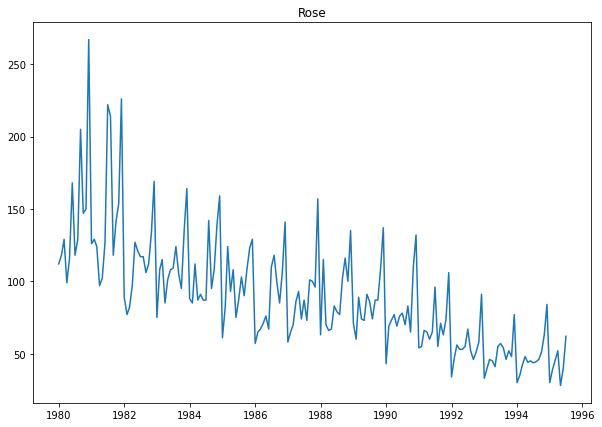

In [205]:
plt.figure(figsize=(10,7))
plt.plot(Rose)

plt.title('Rose')

D:\Softwares\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Monthly Box plot')

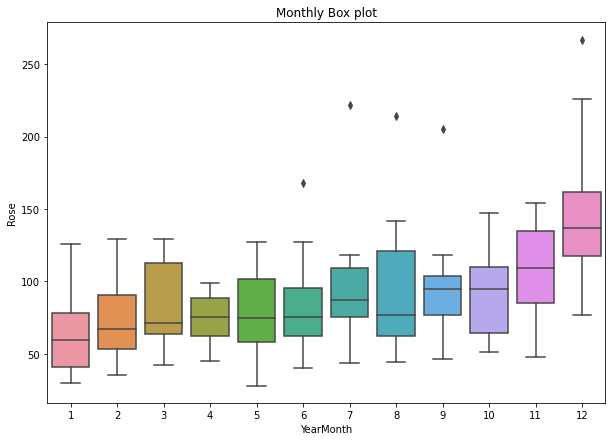

In [206]:
plt.figure(figsize=(10,7))
sns.boxplot(Rose.index.month,Rose.Rose)
plt.title('Monthly Box plot')

D:\Softwares\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Yearly Boxplot')

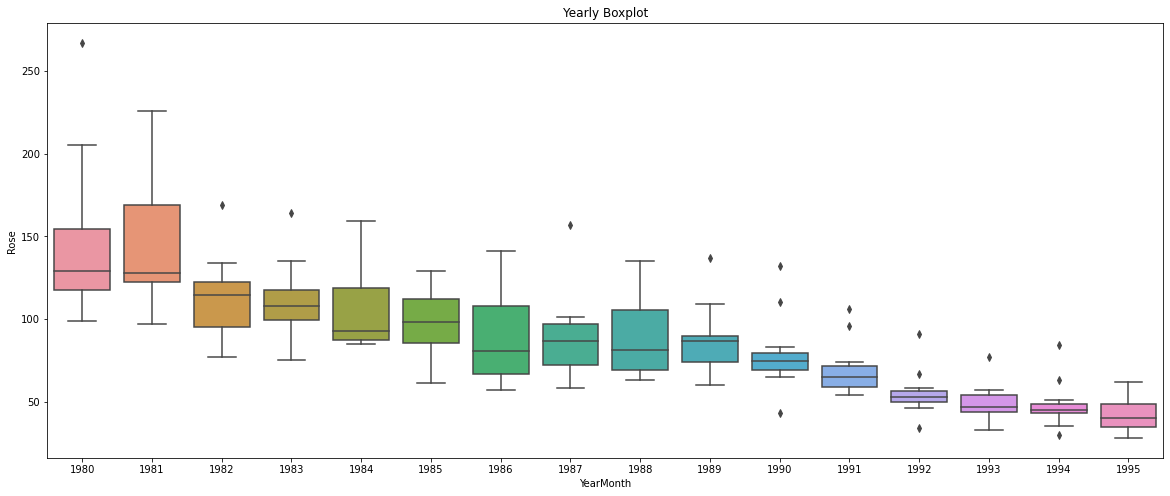

In [207]:
#plt.figure(figsize=(11,7))
sns.boxplot(Rose.index.year,Rose.Rose)
plt.title('Yearly Boxplot')

Text(0.5, 1.0, 'Monthly Distribution')

<Figure size 720x1080 with 0 Axes>

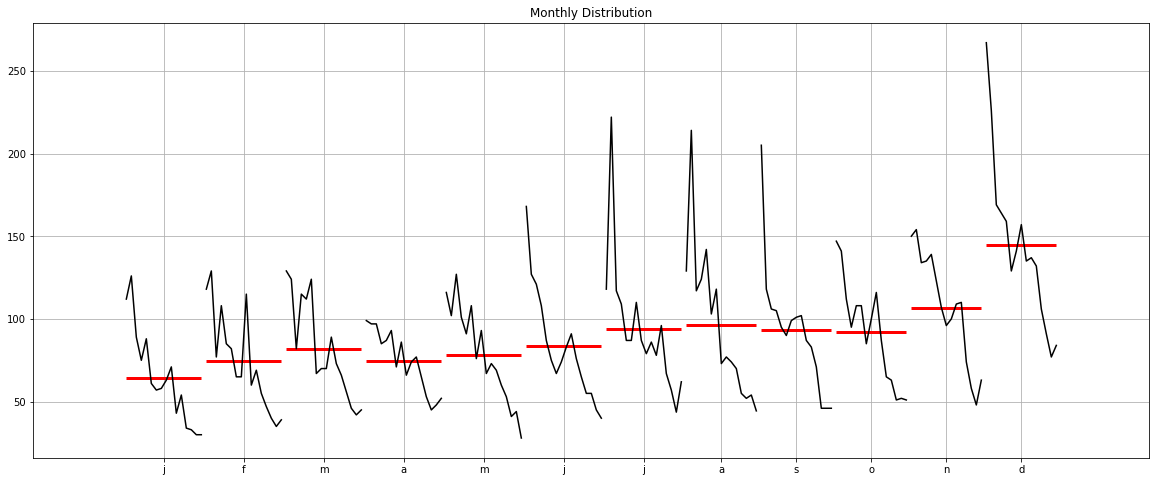

In [208]:
plt.figure(figsize=(10,15))
month_plot(Rose.Rose)
plt.grid()
plt.title('Monthly Distribution')

Text(0.5, 1.0, "Individual Month's sale for all the year")

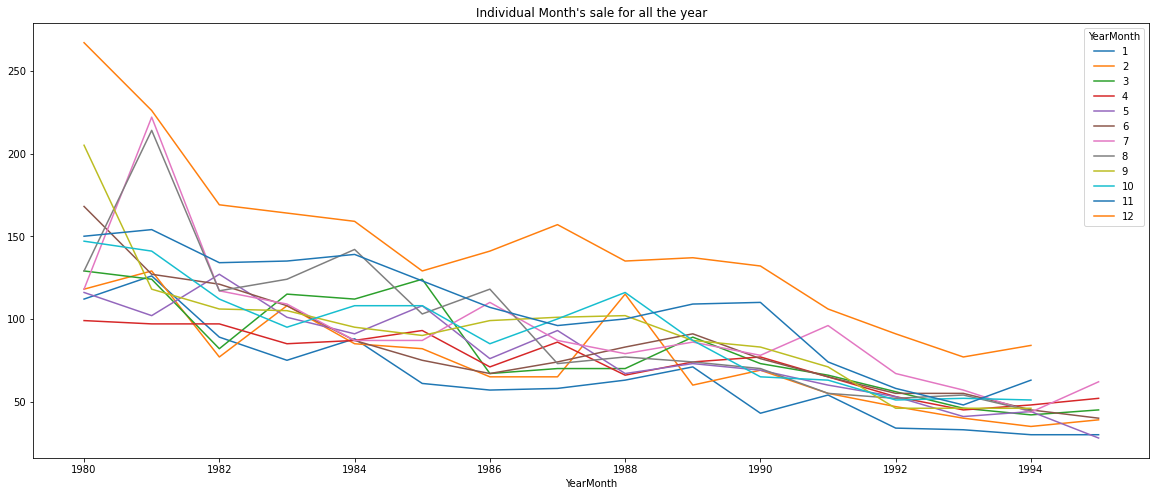

In [209]:
sales_across_month=pd.pivot_table(data=Rose,index=Rose.index.year,
                                  columns=Rose.index.month,values='Rose')
sales_across_month.plot()
plt.title("Individual Month's sale for all the year")

Text(0.5, 1.0, 'Quater sales')

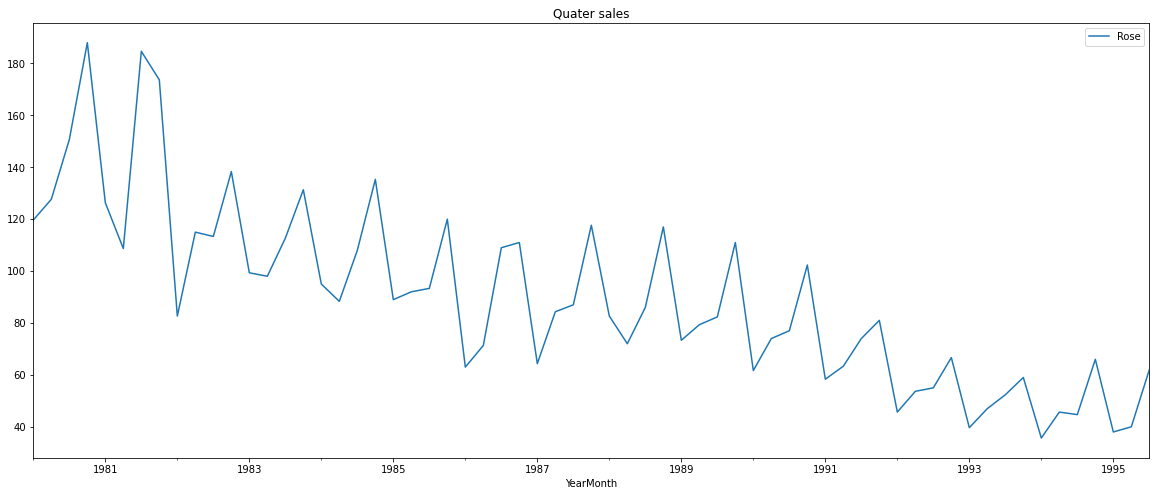

In [210]:
Rose.resample('Q').mean().plot()
plt.title('Quater sales')

Text(0.5, 1.0, 'Cumulative sum of sales')

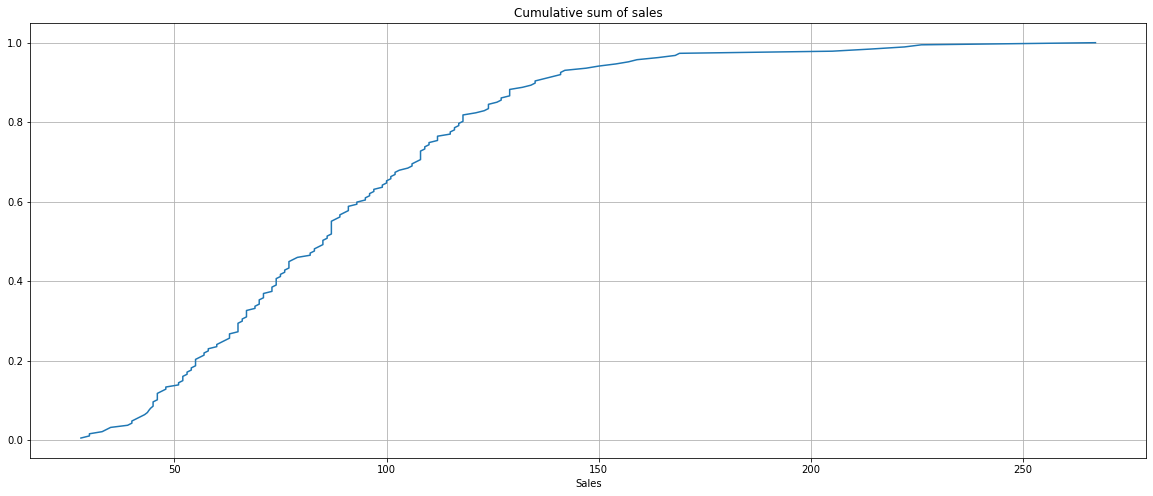

In [211]:
cdf=ECDF(Rose.Rose)
plt.plot(cdf.x,cdf.y,label='Cumulative sum')
plt.grid()
plt.xlabel('Sales')
plt.title('Cumulative sum of sales')

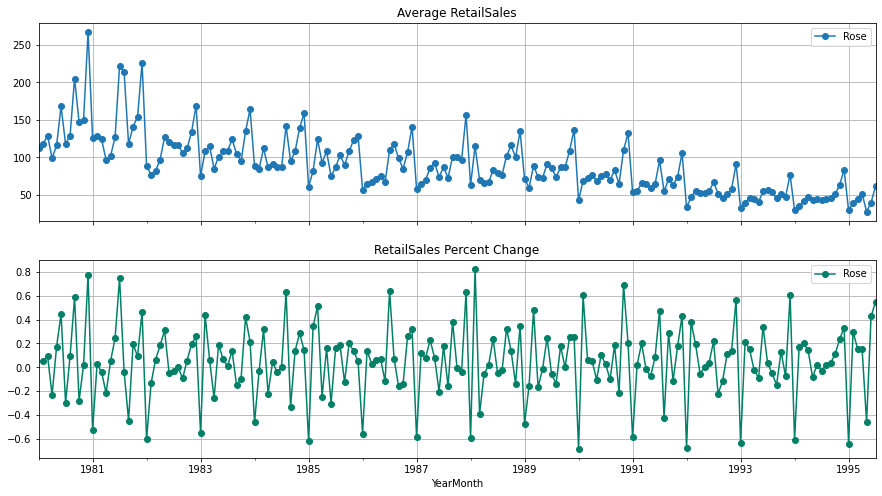

In [212]:
# group by date and get average RetailSales, and precent change
average    = Rose.groupby(Rose.index)["Rose"].mean()
pct_change = Rose.groupby(Rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

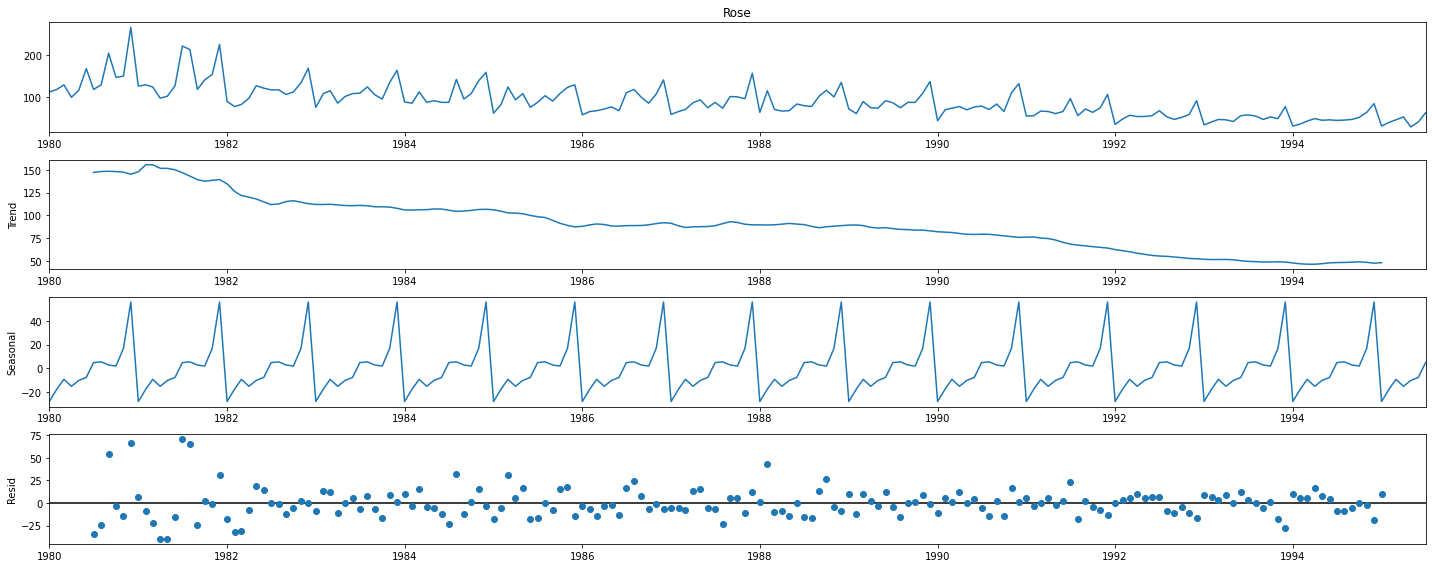

In [213]:
decompose=seasonal_decompose(Rose['Rose'],model='additive')
decompose.plot();

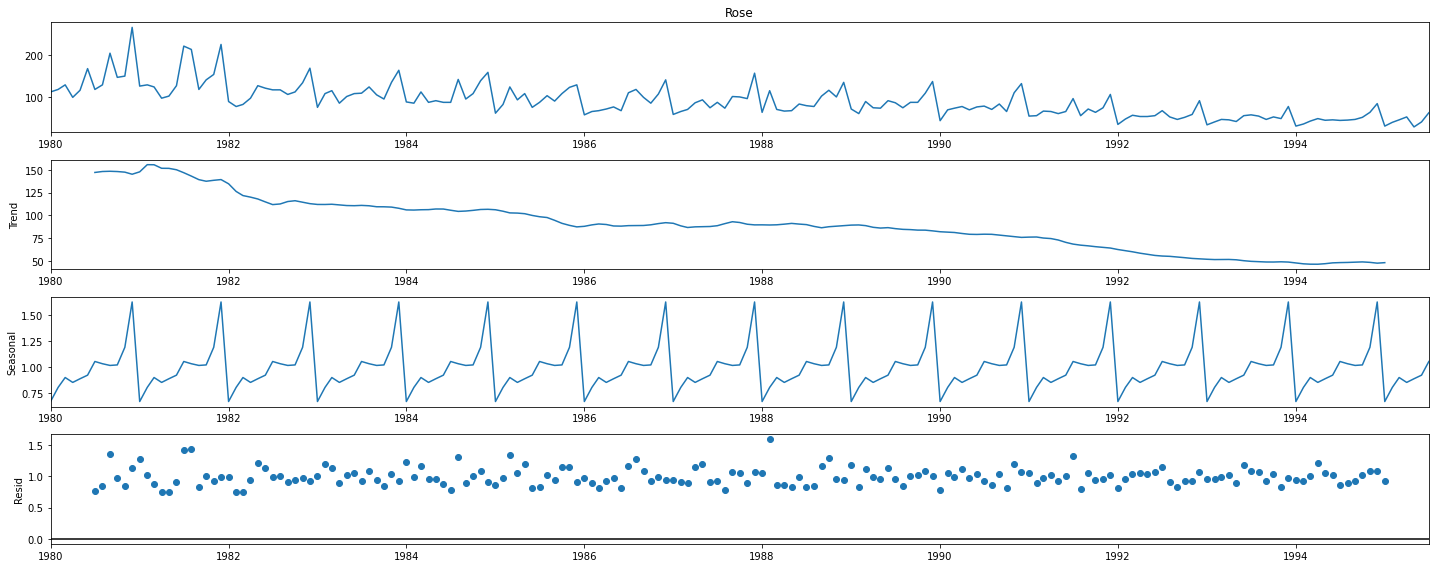

In [214]:
decompose=seasonal_decompose(Rose['Rose'],model='multiplicative')
decompose.plot();

Text(0.5, 1.0, 'Yearly sum of sales')

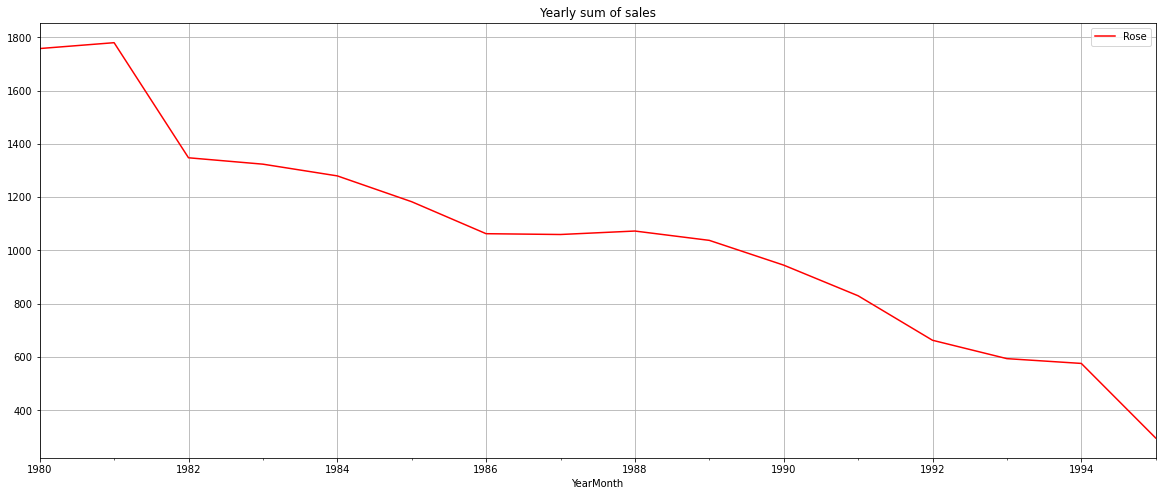

In [215]:
Rose.resample('Y').sum().plot(color='r')
plt.grid()
plt.title('Yearly sum of sales')

Text(0.5, 1.0, 'Average annual sales')

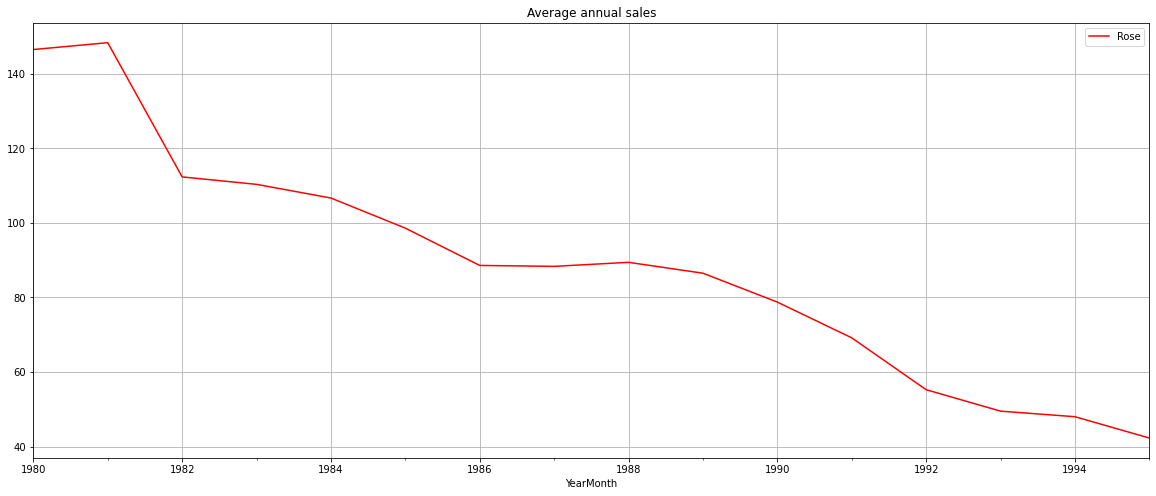

In [216]:
Rose.resample('Y').mean().plot(color='r')
plt.grid()
plt.title('Average annual sales')

Text(0.5, 1.0, 'Quaterly sales')

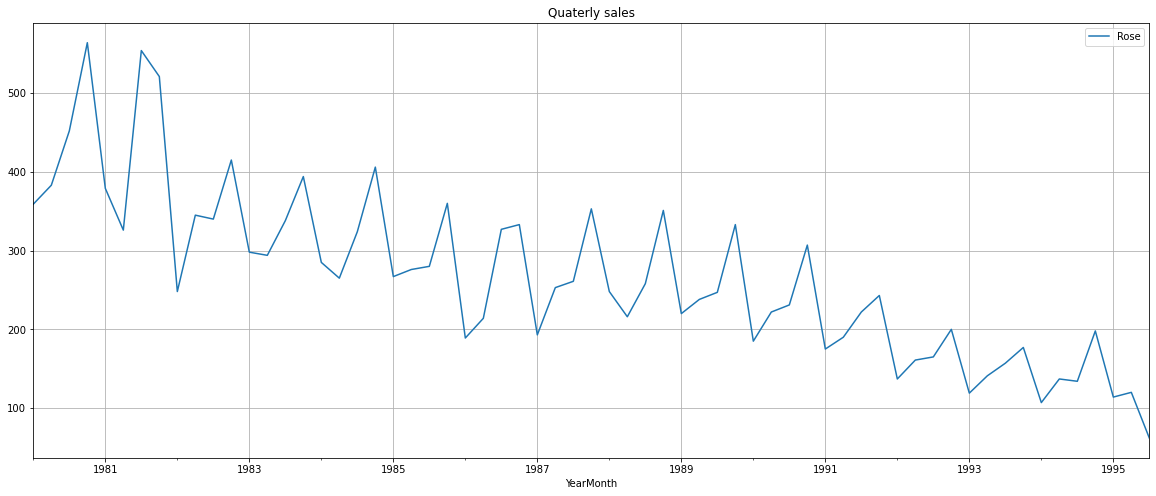

In [217]:
Rose.resample('Q').sum().plot()
plt.grid()
plt.title('Quaterly sales')

Text(0.5, 1.0, 'Average Quaterly sales')

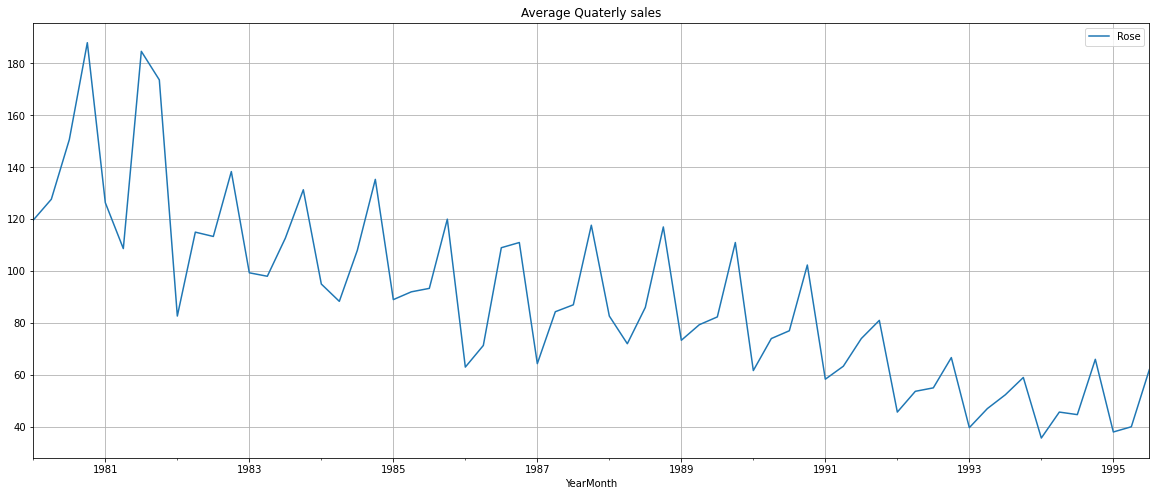

In [218]:
Rose.resample('Q').mean().plot()
plt.grid()
plt.title('Average Quaterly sales')

In [219]:
Rose['months']=np.arange(0,Rose.shape[0])
Rose.head()

,Rose,months
YearMonth,,
1980-01-01,112.0,0
1980-02-01,118.0,1
1980-03-01,129.0,2
1980-04-01,99.0,3
1980-05-01,116.0,4


In [220]:
train=Rose[Rose.index.year<1991]
test=Rose[Rose.index.year>=1991]

In [221]:
train.tail()

,Rose,months
YearMonth,,
1990-08-01,70.0,127
1990-09-01,83.0,128
1990-10-01,65.0,129
1990-11-01,110.0,130
1990-12-01,132.0,131


In [222]:
test.head()

,Rose,months
YearMonth,,
1991-01-01,54.0,132
1991-02-01,55.0,133
1991-03-01,66.0,134
1991-04-01,65.0,135
1991-05-01,60.0,136


In [223]:
print('Size of the train data:',train.shape)
print('Size of the test data:',test.shape)

Size of the train data: (132, 2)
Size of the test data: (55, 2)


## Linear Regression

In [224]:
ln=LinearRegression()
ln.fit(y=train[['Rose']],X=train[['months']])

LinearRegression()

C:\Users\91759\AppData\Local\Temp/ipykernel_1880/1566075264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LinearReg']=ln.predict(test[['months']])


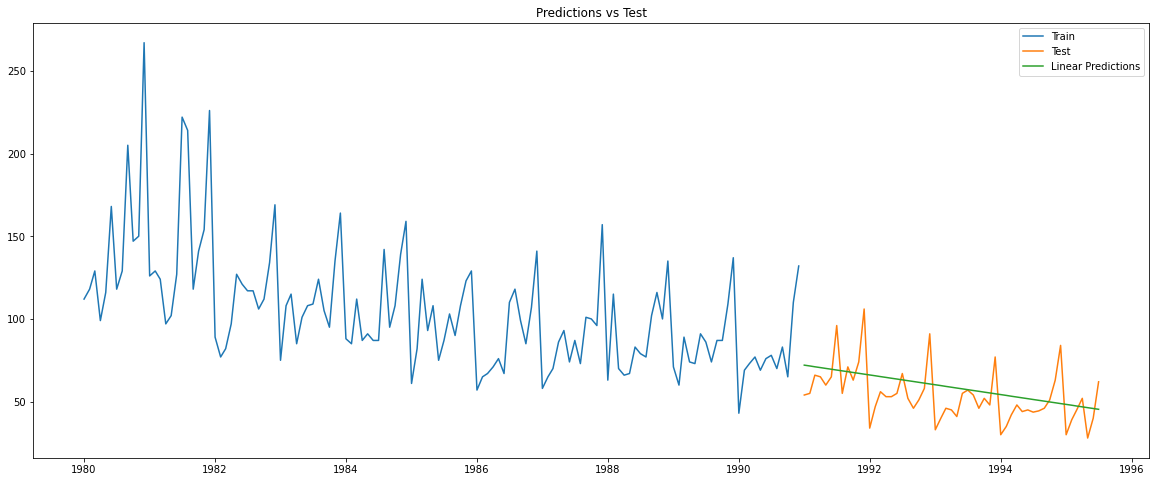

In [225]:
test['LinearReg']=ln.predict(test[['months']])


plt.plot(train.Rose,label='Train')
plt.plot(test.Rose,label='Test')
plt.plot(test.LinearReg,label='Linear Predictions')
plt.legend()
plt.title('Predictions vs Test');

In [226]:
ln_rmse=mean_squared_error(test.Rose,test.LinearReg,squared=False)
print(ln_rmse)

15.291197260531542


In [227]:
results=pd.DataFrame({'RMSE':ln_rmse},index=['Linear_Regression'])
results

,RMSE
Linear_Regression,15.291197


## Naive Bayers model

In [228]:
naive=train.tail(1).Rose.values[0]
naive

132.0

In [229]:
test['Naive']=naive


C:\Users\91759\AppData\Local\Temp/ipykernel_1880/2221364657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Naive']=naive


Text(0.5, 1.0, 'Predictions vs Test')

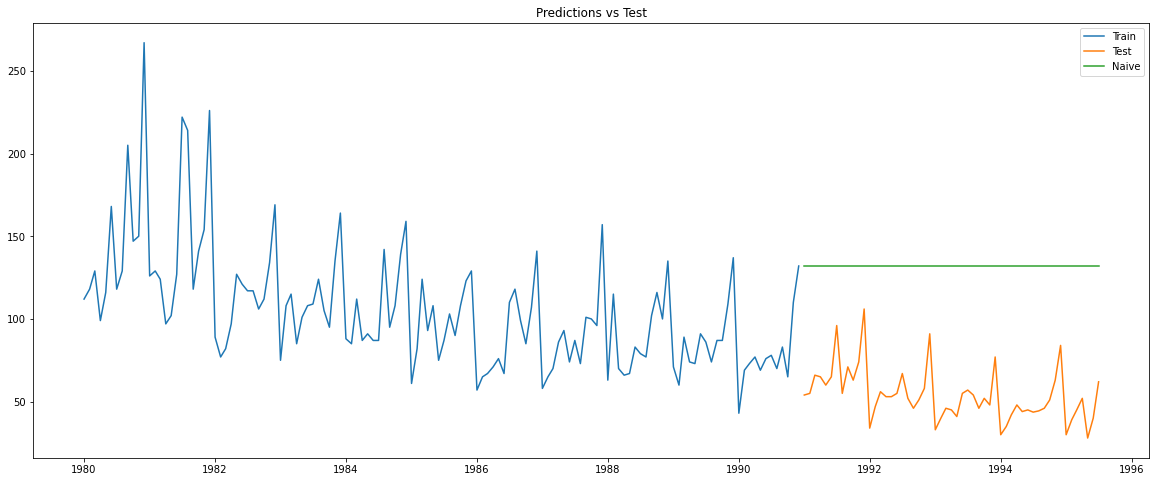

In [230]:
plt.plot(train.Rose,label='Train')
plt.plot(test.Rose,label='Test')
plt.plot(test.Naive,label='Naive')
plt.legend()
plt.title('Predictions vs Test')

In [231]:
naive_rmse=mean_squared_error(test.Rose,test.Naive,squared=False)
print(naive_rmse)

79.77725258383634


In [232]:
results=pd.concat([results,pd.DataFrame({'RMSE':naive_rmse},index=['Naive'])])
results

,RMSE
Linear_Regression,15.291197
Naive,79.777253


## Simple Average

In [233]:
test['Simple_Avg']=train['Rose'].mean()
test.head()

C:\Users\91759\AppData\Local\Temp/ipykernel_1880/3222454682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Simple_Avg']=train['Rose'].mean()


,Rose,months,LinearReg,Naive,Simple_Avg
YearMonth,,,,,
1991-01-01,54.0,132,72.063266,132.0,104.939394
1991-02-01,55.0,133,71.568888,132.0,104.939394
1991-03-01,66.0,134,71.074511,132.0,104.939394
1991-04-01,65.0,135,70.580133,132.0,104.939394
1991-05-01,60.0,136,70.085755,132.0,104.939394


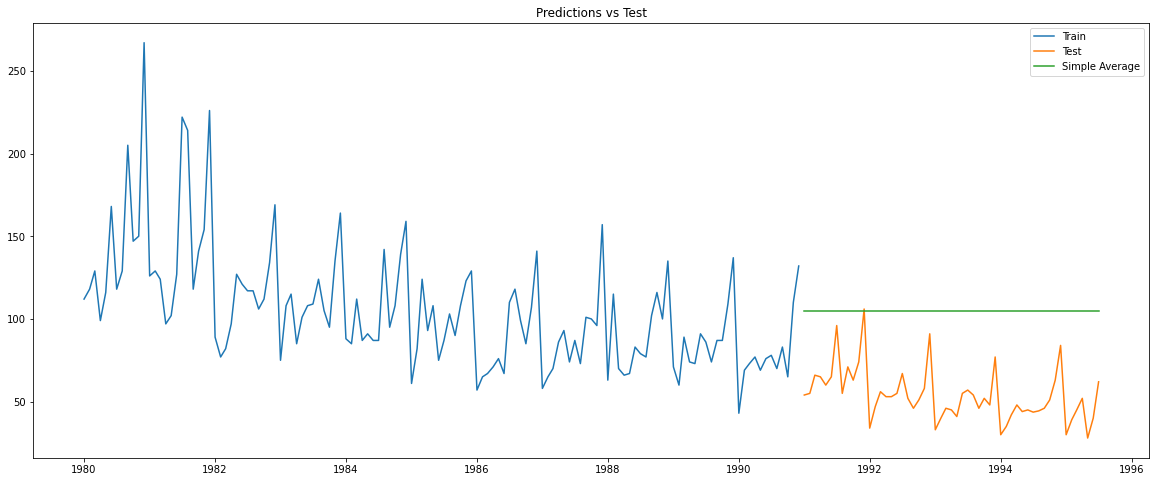

In [234]:
plt.plot(train.Rose,label='Train')
plt.plot(test.Rose,label='Test')
plt.plot(test.Simple_Avg,label='Simple Average')
plt.legend()
plt.title('Predictions vs Test');

In [235]:
Simple_avg_rmse=mean_squared_error(test.Rose,test.Simple_Avg,squared=False)
print(Simple_avg_rmse)

53.52072154565131


In [236]:
results=pd.concat([results,pd.DataFrame({'RMSE':Simple_avg_rmse},index=['Simple_Avg'])])
results

,RMSE
Linear_Regression,15.291197
Naive,79.777253
Simple_Avg,53.520722


## Moving Average

In [237]:
MovingAverage=Rose.copy()

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_5'] = MovingAverage['Rose'].rolling(5).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_7'] = MovingAverage['Rose'].rolling(7).mean()
MovingAverage.head()

,Rose,months,Trailing_2,Trailing_3,Trailing_4,Trailing_5,Trailing_6,Trailing_7
YearMonth,,,,,,,,
1980-01-01,112.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-01,118.0,1,115.0,NaN,NaN,NaN,NaN,NaN
1980-03-01,129.0,2,123.5,119.666667,NaN,NaN,NaN,NaN
1980-04-01,99.0,3,114.0,115.333333,114.5,NaN,NaN,NaN
1980-05-01,116.0,4,107.5,114.666667,115.5,114.8,NaN,NaN


In [238]:
MovingAverage

,Rose,months,Trailing_2,Trailing_3,Trailing_4,Trailing_5,Trailing_6,Trailing_7
YearMonth,,,,,,,,
1980-01-01,112.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-01,118.0,1,115.0,NaN,NaN,NaN,NaN,NaN
1980-03-01,129.0,2,123.5,119.666667,NaN,NaN,NaN,NaN
1980-04-01,99.0,3,114.0,115.333333,114.50,NaN,NaN,NaN
1980-05-01,116.0,4,107.5,114.666667,115.50,114.8,NaN,NaN
...,...,...,...,...,...,...,...,...
1995-03-01,45.0,182,42.0,38.000000,49.50,52.2,52.000000,51.142857
1995-04-01,52.0,183,48.5,45.333333,41.50,50.0,52.166667,52.000000
1995-05-01,28.0,184,40.0,41.666667,41.00,38.8,46.333333,48.714286


In [239]:
trailing_MovingAverage_train=MovingAverage[0:int(len(train))] 
trailing_MovingAverage_test=MovingAverage[int(len(train)):]

In [240]:
trailing_MovingAverage_test.shape

(55, 8)

Text(0, 0.5, 'Years')

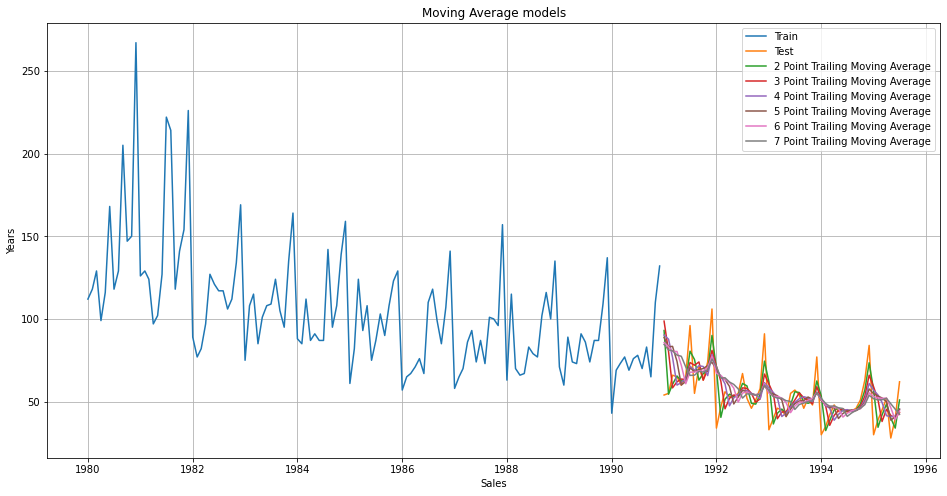

In [241]:

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label = '4 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_5'],label = '5 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_7'],label = '7 Point Trailing Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average models')
plt.xlabel('Sales')
plt.ylabel('Years')

In [242]:
rmse_list=[mean_squared_error(test['Rose'],trailing_MovingAverage_test[x],squared=False) for x in MovingAverage.columns[2:]]
for i,x in enumerate(MovingAverage.columns[2:]):
    print("For {} point Moving Average Model forecast on the Training Data,  RMSE is {}".format(i+2,rmse_list[i]) )
    
    results=pd.concat([results,pd.DataFrame({'RMSE':rmse_list[i]},index=[x])])


For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530179857353627
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 14.129476303199834
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.462022626370864
For 5 point Moving Average Model forecast on the Training Data,  RMSE is 14.490389532601862
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.58683041892348
For 7 point Moving Average Model forecast on the Training Data,  RMSE is 15.077137800349332


In [243]:
results

,RMSE
Linear_Regression,15.291197
Naive,79.777253
Simple_Avg,53.520722
Trailing_2,11.530180
Trailing_3,14.129476
Trailing_4,14.462023
Trailing_5,14.490390
Trailing_6,14.586830
Trailing_7,15.077138


Text(0.5, 0, 'Years')

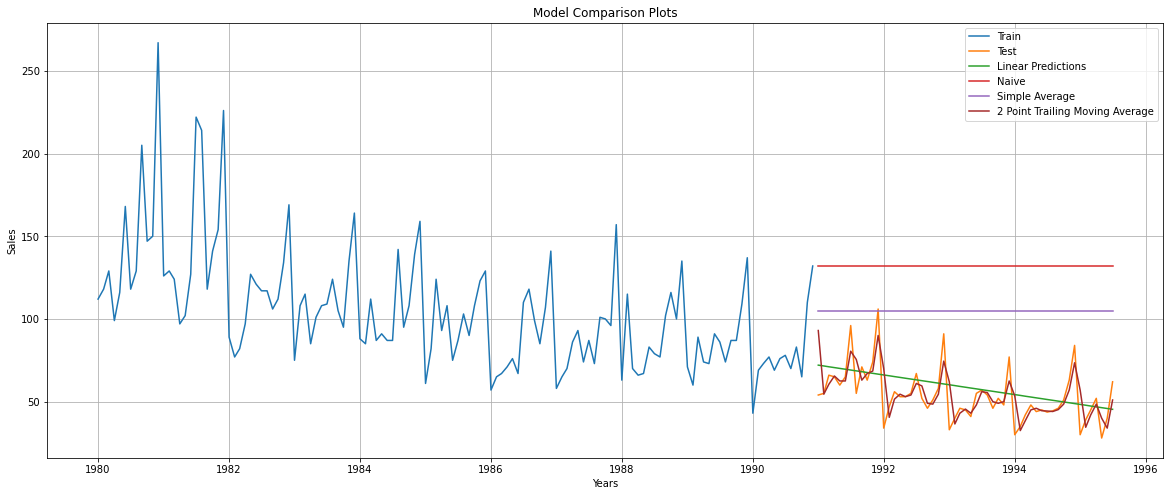

In [244]:

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test.LinearReg,label='Linear Predictions')

plt.plot(test.Naive,label='Naive')

plt.plot(test.Simple_Avg,label='Simple Average')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average',color='brown')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();
plt.ylabel('Sales')
plt.xlabel('Years')


## Exponential Smoothing Methods

In [245]:

Rose.drop(columns=['months'],inplace=True)


In [246]:
train=Rose[Rose.index.year<1991]
test=Rose[Rose.index.year>=1991]

## Simple Exponential smoothing

In [247]:
#Simple Exponential smoothing
model_SES=SimpleExpSmoothing(train,initialization_method='estimated').fit(optimized=True)
model_SES.params

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [248]:
SES_predict=model_SES.forecast(steps=len(test))
SES_predict.head()

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
Freq: MS, dtype: float64

Text(0, 0.5, 'Sales')

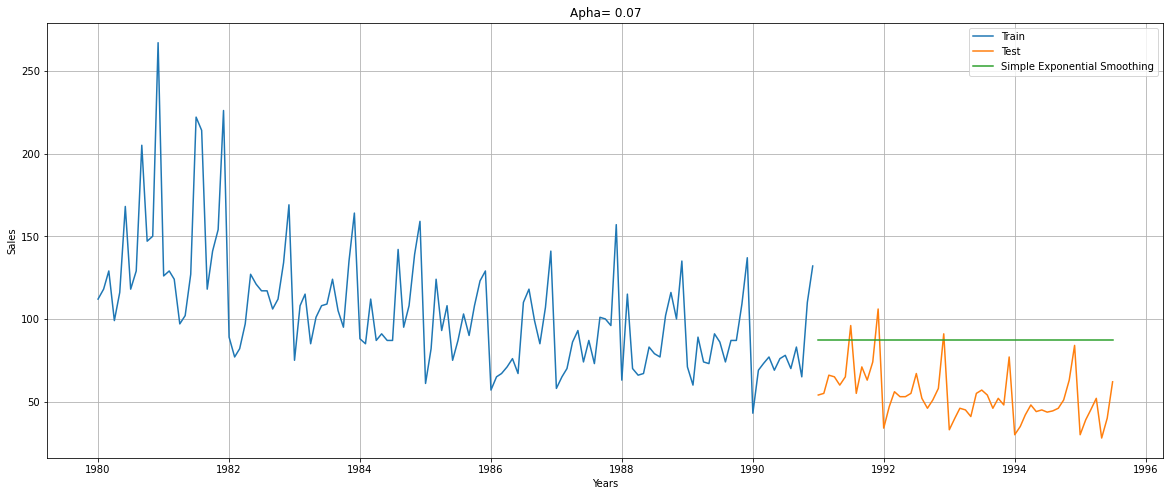

In [249]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(SES_predict,label='Simple Exponential Smoothing')
plt.legend()
plt.grid()
plt.title('Apha= 0.07')
plt.xlabel('Years')
plt.ylabel('Sales')

In [250]:
print('RMSE for Simple Exponential Smoothing model is :',mean_squared_error(SES_predict,test,squared=False))

RMSE for Simple Exponential Smoothing model is : 36.85773207961912


In [251]:
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(SES_predict,test,squared=False)},index=['Simple_Exponential_Smoothing'])])

In [252]:
results

,RMSE
Linear_Regression,15.291197
Naive,79.777253
Simple_Avg,53.520722
Trailing_2,11.530180
Trailing_3,14.129476
Trailing_4,14.462023
Trailing_5,14.490390
Trailing_6,14.586830
Trailing_7,15.077138
Simple_Exponential_Smoothing,36.857732


## Double Exponential smoothing(Hotl's Method)

In [253]:
model_DES=Holt(train,initialization_method='estimated').fit(optimized=True)
model_DES.params

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.6610391146660035e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81553690867275,
 'initial_trend': -0.4943781897068274,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [254]:
DES_predict=model_DES.forecast(len(test))
DES_predict.head()

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
Freq: MS, dtype: float64

Text(0.5, 0, 'Years')

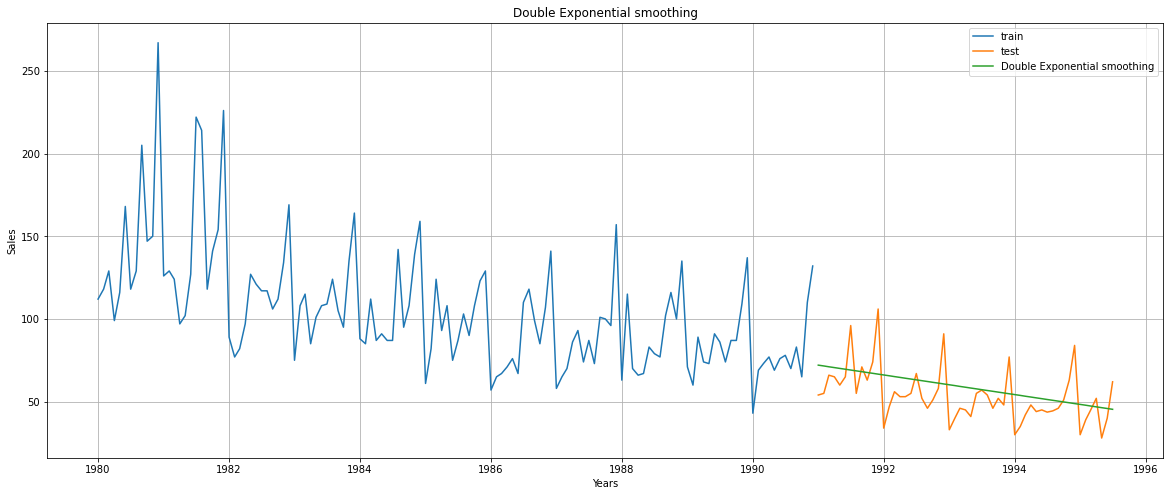

In [255]:
plt.plot(train,label='train')
plt.plot(test,label='test')
#plt.plot(SES_predict,label='Simple Exponetial smoothing')
plt.plot(DES_predict,label='Double Exponential smoothing')
plt.legend()
plt.grid()
plt.title('Double Exponential smoothing')
plt.ylabel('Sales')
plt.xlabel('Years')

In [256]:
print('RMSE for Double Exponential Smoothing model is :',mean_squared_error(DES_predict,test,squared=False))
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(DES_predict,test,squared=False)},
                                        index=['Double_Exponential_Smoothing'])])

RMSE for Double Exponential Smoothing model is : 15.291185695711361


In [257]:
results

,RMSE
Linear_Regression,15.291197
Naive,79.777253
Simple_Avg,53.520722
Trailing_2,11.530180
Trailing_3,14.129476
Trailing_4,14.462023
Trailing_5,14.490390
Trailing_6,14.586830
Trailing_7,15.077138
Simple_Exponential_Smoothing,36.857732


## Holt Winter's Method

In [258]:
model_TES=ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated').fit(optimized=True)
model_TES.params

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.08954054664605082,
 'smoothing_trend': 0.0002400108693915795,
 'smoothing_seasonal': 0.003466872515750747,
 'damping_trend': nan,
 'initial_level': 146.5570157826235,
 'initial_trend': -0.547196983509005,
 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
        -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
          4.79381122,   2.96110122,  21.05738849,  63.18279918]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [259]:
TES_predict=model_TES.forecast(len(test))
TES_predict.head()

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    42.684928
1991-02-01    54.564005
1991-03-01    61.995209
1991-04-01    50.852018
1991-05-01    59.034271
Freq: MS, dtype: float64

Text(0.5, 1.0, "Holt winter's model")

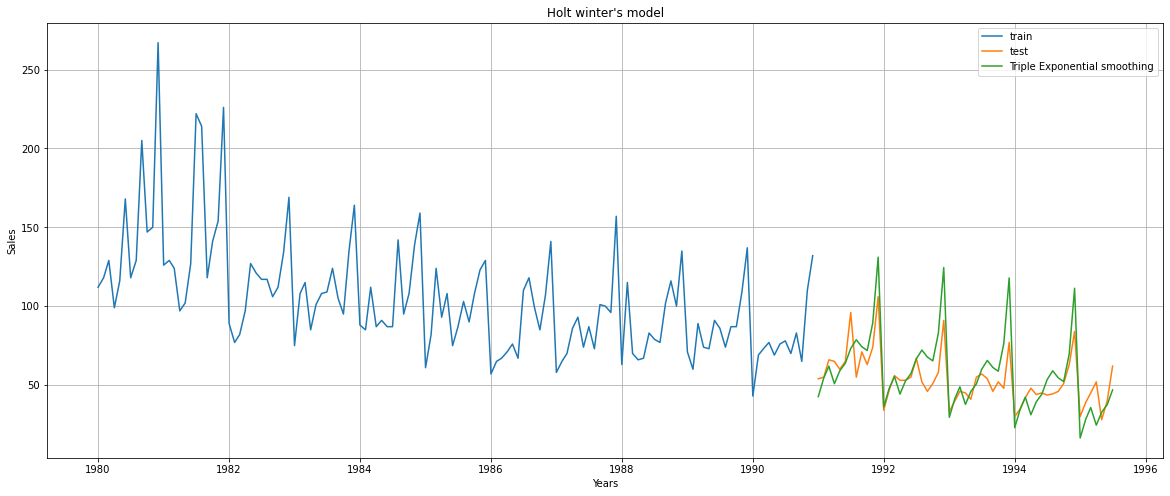

In [260]:
plt.plot(train,label='train')
plt.plot(test,label='test')
#plt.plot(SES_predict,label='Simple Exponetial smoothing')
#plt.plot(DES_predict,label='Double Exponential smoothing')
plt.plot(TES_predict,label='Triple Exponential smoothing')
plt.legend()
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title("Holt winter's model")

In [261]:
print('RMSE for Holt winter Smoothing model is :',mean_squared_error(TES_predict,test,squared=False))
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(TES_predict,test,squared=False)},
                                        index=['Holt_winter'])])

RMSE for Holt winter Smoothing model is : 14.291386881749576


In [262]:
results

,RMSE
Linear_Regression,15.291197
Naive,79.777253
Simple_Avg,53.520722
Trailing_2,11.530180
Trailing_3,14.129476
Trailing_4,14.462023
Trailing_5,14.490390
Trailing_6,14.586830
Trailing_7,15.077138
Simple_Exponential_Smoothing,36.857732


Text(0.5, 1.0, 'Model Comparison')

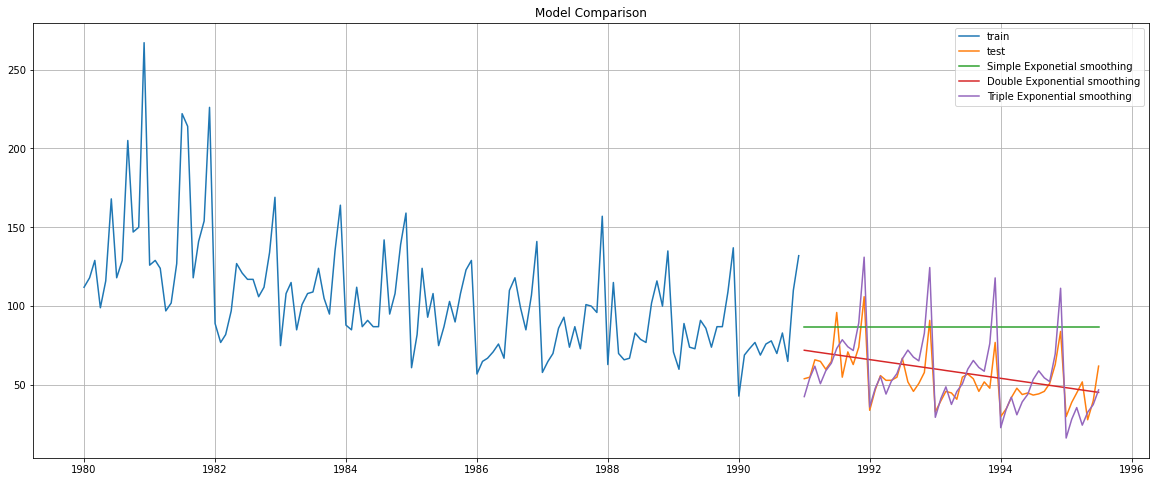

In [263]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='Simple Exponetial smoothing')
plt.plot(DES_predict,label='Double Exponential smoothing')
plt.plot(TES_predict,label='Triple Exponential smoothing')
plt.legend()
plt.grid()
plt.title('Model Comparison')

## Check for stationarity of the data

In [264]:
from statsmodels.tsa.stattools import adfuller

In [265]:
dftest=adfuller(Rose,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.46738880030706276
Number of lags used 13


In [266]:
dftest=adfuller(Rose.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.160
DF test p-value is 3.0483314382153244e-11
Number of lags used 12


Text(0, 0.5, 'Difference')

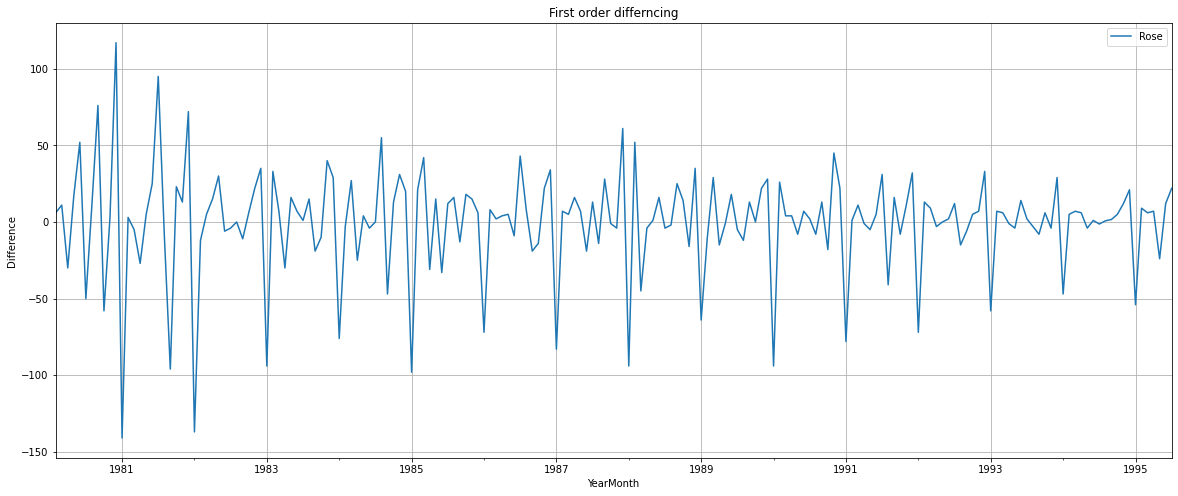

In [267]:
Rose.diff().dropna().plot(grid=True)
plt.title('First order differncing')
plt.ylabel('Difference')

Text(0, 0.5, 'Difference')

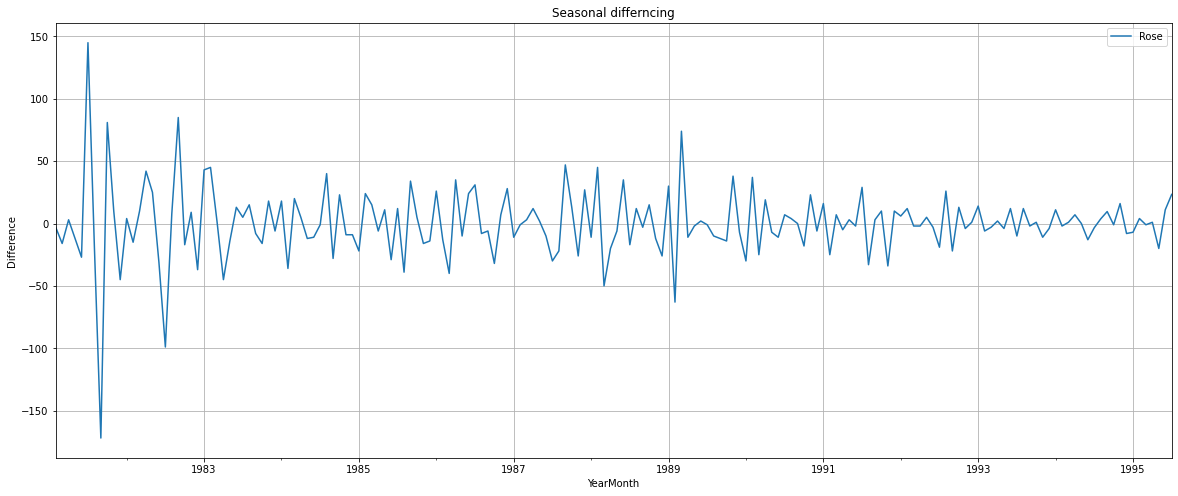

In [268]:
Rose.diff(12).dropna().diff().dropna().plot(grid=True)
plt.title('Seasonal differncing')
plt.ylabel('Difference')

In [269]:
dftest=adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.8948313567816136e-08
Number of lags used 12


## Building an automated version of SARIMA model

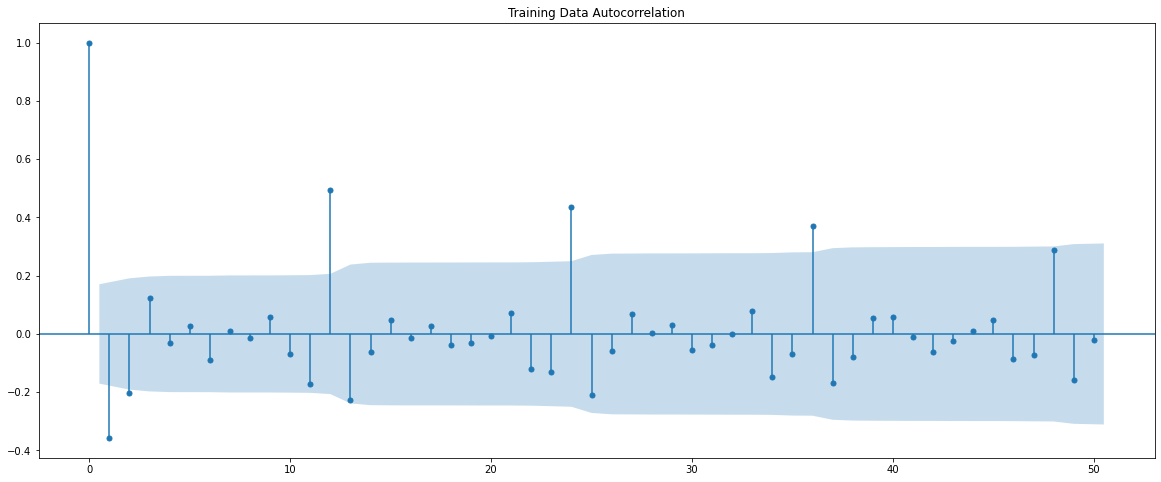

In [270]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=50);

In [271]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [112]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)

pdq=list(itertools.product(p, d, q))
PDQ = list(itertools.product(p, D, q,[12]))


from statsmodels.tsa.statespace import sarimax
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model=sarimax.SARIMAX(train,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results_SARIMA_12 = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_12.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_12.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1342.887979632021
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1127.6939671247724
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1132.3491004641107
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:973.283964724266
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:819.2632583149633
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1123.327544387293
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1072.6552135796983
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:947.5166315722012
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:982.5608243528003
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:970.9074505848811
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:821.1204806448011
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:939.9681316162017
SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:941.4830987726914
SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:931.5268653841097
SARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:828.5116218528785
SARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:822.8736935508383
SARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:814.9165424452355
SARIMA(0, 0, 1)x(0, 0, 0,

SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:915.1352069258326
SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:934.4242987004374
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:919.5722546575843
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:788.3877523417395
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:914.6873883763265
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:932.0304692605489
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:900.2563586433571
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:809.1023799334444
SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:808.5333665424331
SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:780.9929669372357
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585707
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257693
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1164.5103013842067
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:953.8813887547028
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:828.8398832821205
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.408005502361
SARIMA(1, 1, 0)x(1, 0, 2, 

SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.8928054278833
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335676834754
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.91021161467
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598225
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.325831110029
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.4823964822049
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:904.7004130514974
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:784.1409487677932
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713669489
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.190935440186
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.666148880498
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3705668461805
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:915.6932523909741
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:785.828254581471
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464442046732
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889026694
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687980805635
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.7799442942127
SARIMA(2, 1, 2)x(2, 1, 1, 12)

In [113]:
SARIMA_AIC.sort_values(by='AIC').head(5)

,param,seasonal,AIC
107,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
215,"(1, 1, 2)","(2, 1, 2, 12)",776.940164
323,"(2, 1, 2)","(2, 1, 2, 12)",776.996100
269,"(2, 0, 2)","(2, 1, 2, 12)",780.716944
161,"(1, 0, 2)","(2, 1, 2, 12)",780.992967


In [272]:

import statsmodels.api as sm


auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 19 Dec 2021   AIC                            774.969
Time:                                    14:41:51   BIC                            792.622
Sample:                                01-01-1980   HQIC                           782.094
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.167      0.000      -1.314      -0.591
ma.L2         -0.0763      0.126   

In [273]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [274]:
print('RMSE for Auto Sarima model is :',mean_squared_error(predicted_auto_SARIMA_12.predicted_mean,test,squared=False))
rmse=mean_squared_error(predicted_auto_SARIMA_12.predicted_mean,test,squared=False)

sarima_models=pd.DataFrame({'RMSE':[rmse]},index=['SARIMAX(0, 1, 2)x(2, 1, 2, 12)'])
sarima_models
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(predicted_auto_SARIMA_12.predicted_mean,test,squared=False)},
                                        index=['Auto_SARIMA(0, 1, 2)x(2, 1, 2, 12)'])])

RMSE for Auto Sarima model is : 16.556084655369734


In [275]:
results

,RMSE
Linear_Regression,15.291197
Naive,79.777253
Simple_Avg,53.520722
Trailing_2,11.530180
Trailing_3,14.129476
Trailing_4,14.462023
Trailing_5,14.490390
Trailing_6,14.586830
Trailing_7,15.077138
Simple_Exponential_Smoothing,36.857732


Text(0.5, 1.0, 'Auto Sarima predictions')

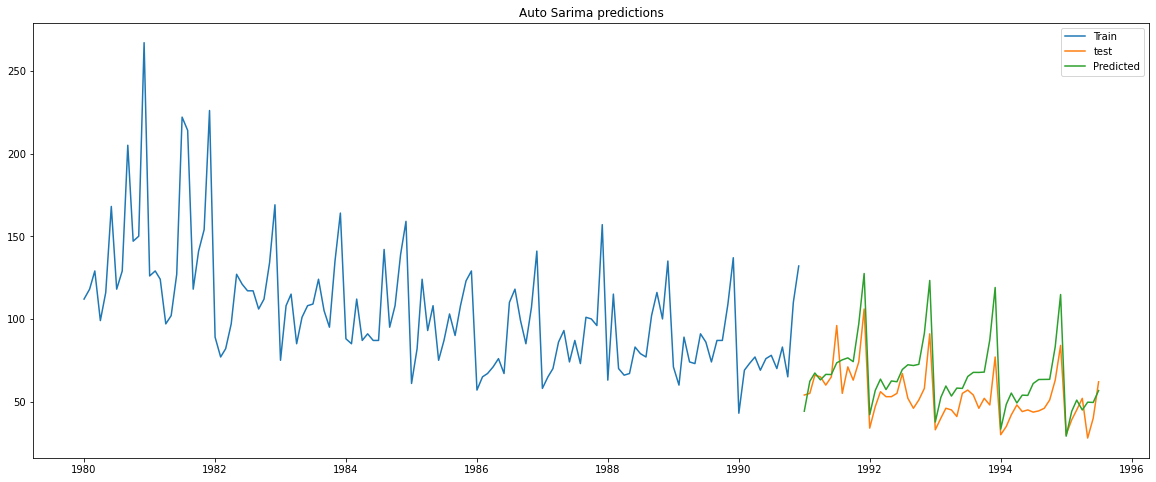

In [178]:

plt.plot(train,label='Train')
plt.plot(test,label='test')
plt.plot(predicted_auto_SARIMA_12.predicted_mean,label='Predicted')
plt.legend()
plt.title('Auto Sarima predictions')

### Trying model with seasonality 6

In [120]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)

pdq=list(itertools.product(p, d, q))
PDQ = list(itertools.product(p, D, q,[6]))

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

from statsmodels.tsa.statespace import sarimax
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model=sarimax.SARIMAX(train,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results_SARIMA_6 = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_6.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_6.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:1470.1087725948707
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:1295.568599004357
SARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:1320.0985789105328
SARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:1166.6525964307093
SARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:1069.74070692745
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:1324.0093250265643
SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:1206.9316940921835
SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:1128.5808515388335
SARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:1128.961846229569
SARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:1122.145339474301
SARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:1030.9463542784154
SARIMA(0, 0, 0)x(2, 0, 0, 6) - AIC:1116.886296838044
SARIMA(0, 0, 0)x(2, 0, 1, 6) - AIC:1117.3862628841562
SARIMA(0, 0, 0)x(2, 0, 2, 6) - AIC:1074.3240236279787
SARIMA(0, 0, 0)x(2, 1, 0, 6) - AIC:1073.2580938219055
SARIMA(0, 0, 0)x(2, 1, 1, 6) - AIC:1065.6257757310073
SARIMA(0, 0, 0)x(2, 1, 2, 6) - AIC:1032.8602336039144
SARIMA(0, 0, 1)x(0, 0, 0, 6) - AIC

SARIMA(1, 0, 2)x(1, 1, 0, 6) - AIC:1112.3000341224174
SARIMA(1, 0, 2)x(1, 1, 1, 6) - AIC:1094.3392181510371
SARIMA(1, 0, 2)x(1, 1, 2, 6) - AIC:961.7307606702748
SARIMA(1, 0, 2)x(2, 0, 0, 6) - AIC:1085.7398769548677
SARIMA(1, 0, 2)x(2, 0, 1, 6) - AIC:1086.5322836896792
SARIMA(1, 0, 2)x(2, 0, 2, 6) - AIC:1055.5510685821312
SARIMA(1, 0, 2)x(2, 1, 0, 6) - AIC:1034.881542396401
SARIMA(1, 0, 2)x(2, 1, 1, 6) - AIC:1022.080693994094
SARIMA(1, 0, 2)x(2, 1, 2, 6) - AIC:963.5066290048138
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1249.876322526743
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1135.5498105815732
SARIMA(1, 1, 0)x(0, 1, 0, 6) - AIC:1348.9168051973102
SARIMA(1, 1, 0)x(0, 1, 1, 6) - AIC:1174.4494600669134
SARIMA(1, 1, 0)x(0, 1, 2, 6) - AIC:1076.7421093656772
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1250.6246888229612
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1230.6009595918094
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1133.8029696518868
SARIMA(1, 1, 0)x(1, 1, 0, 6) - AIC

SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.91021161467
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.769192693437
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033342526
SARIMA(2, 1, 2)x(0, 1, 0, 6) - AIC:1278.7390386644418
SARIMA(2, 1, 2)x(0, 1, 1, 6) - AIC:1115.2176717740977
SARIMA(2, 1, 2)x(0, 1, 2, 6) - AIC:1011.1384014812686
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510945
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283234309286
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103228291145
SARIMA(2, 1, 2)x(1, 1, 0, 6) - AIC:1094.6959823250488
SARIMA(2, 1, 2)x(1, 1, 1, 6) - AIC:1084.4938580414614
SARIMA(2, 1, 2)x(1, 1, 2, 6) - AIC:957.8063019193186
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457819334
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798944245
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2203679536137
SARIMA(2, 1, 2)x(2, 1, 0, 6) - AIC:994.9724169519653
SARIMA(2, 1, 2)x(2, 1, 1, 6) - AIC:1004.974614803498
SARIMA(2, 1, 2)x(2, 1, 2, 6) - AIC:959.8061488475836


In [121]:
SARIMA_AIC.sort_values(by='AIC').head(15)

,param,seasonal,AIC
101,"(0, 1, 2)","(1, 1, 2, 6)",956.620458
317,"(2, 1, 2)","(1, 1, 2, 6)",957.806302
107,"(0, 1, 2)","(2, 1, 2, 6)",958.620425
209,"(1, 1, 2)","(1, 1, 2, 6)",959.067736
323,"(2, 1, 2)","(2, 1, 2, 6)",959.806149
215,"(1, 1, 2)","(2, 1, 2, 6)",960.682596
155,"(1, 0, 2)","(1, 1, 2, 6)",961.730761
263,"(2, 0, 2)","(1, 1, 2, 6)",963.504108
161,"(1, 0, 2)","(2, 1, 2, 6)",963.506629
269,"(2, 0, 2)","(2, 1, 2, 6)",965.026492


In [123]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0, 1, 2),
                                seasonal_order=(1, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -472.310
Date:                           Wed, 15 Dec 2021   AIC                            956.620
Time:                                   15:13:49   BIC                            972.823
Sample:                               01-01-1980   HQIC                           963.192
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8657      0.129     -6.711      0.000      -1.118      -0.613
ma.L2         -0.2373      0.105     -2.260

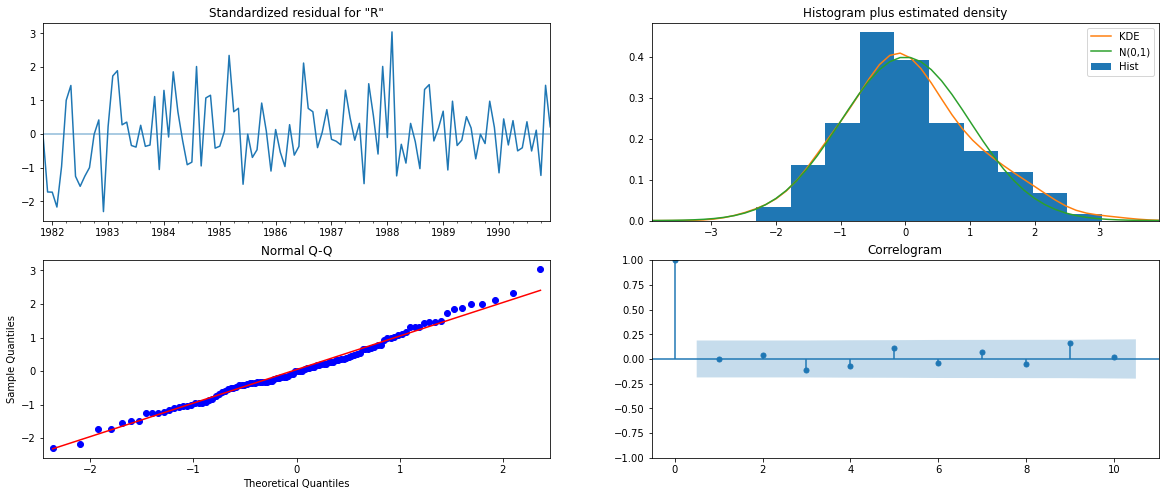

In [124]:
results_auto_SARIMA_6.plot_diagnostics();

In [125]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [126]:
print('RMSE for Auto Sarima model is :',mean_squared_error(predicted_auto_SARIMA_6.predicted_mean,test,squared=False))
rmse=mean_squared_error(predicted_auto_SARIMA_6.predicted_mean,test,squared=False)

sarima_models=pd.concat([sarima_models,pd.DataFrame({'RMSE':[rmse]},index=['SARIMAX(0, 1, 2)x(1,1, 2, 6)'])])
sarima_models

results=pd.concat([results,pd.DataFrame({'RMSE':[rmse]},index=['SARIMAX(0, 1, 2)x(1,1, 2, 6)'])])
results

RMSE for Auto Sarima model is : 18.46536335925801


,RMSE
"SARIMAX0, 1, 2)x(2, 1, 2, 12)",16.556085
"SARIMAX(0, 1, 2)x(1,1, 2, 6)",18.465363


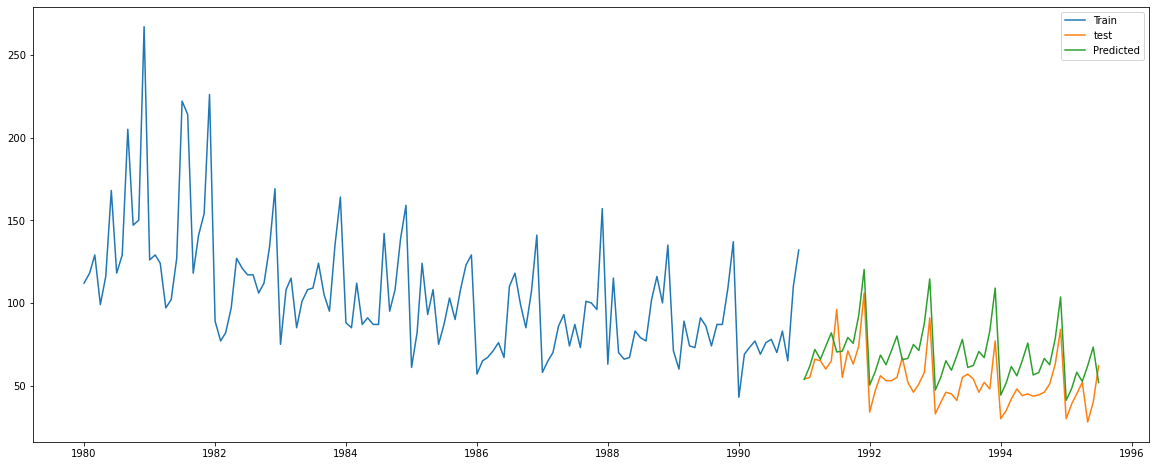

In [127]:

plt.plot(train,label='Train')
plt.plot(test,label='test')
plt.plot(predicted_auto_SARIMA_6.predicted_mean,label='Predicted')
plt.legend()

## Manual building of Sarima model

<AxesSubplot:xlabel='YearMonth'>

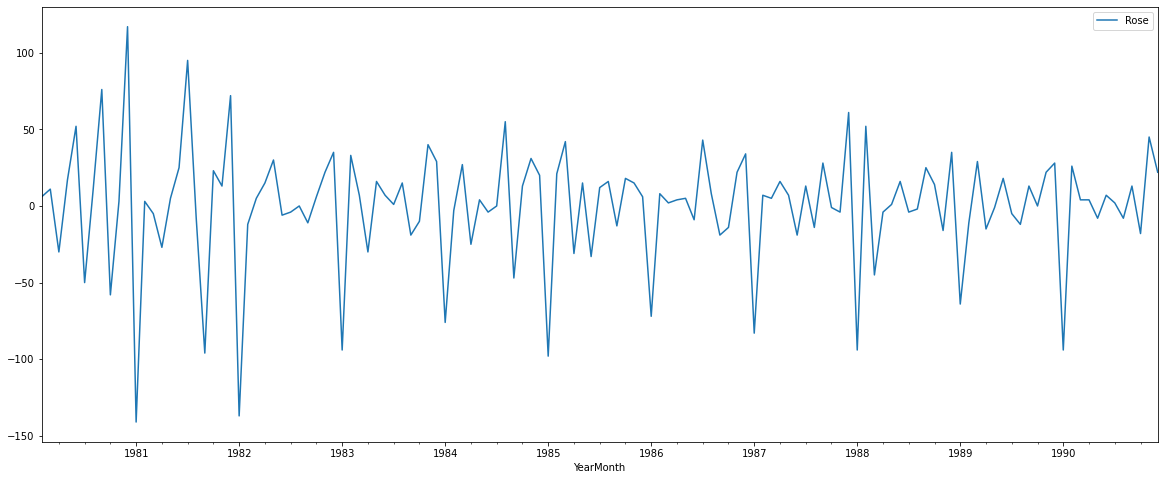

In [128]:
train.diff(1).dropna().plot()

In [129]:
dftest=adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.8948313567816136e-08
Number of lags used 12


<AxesSubplot:xlabel='YearMonth'>

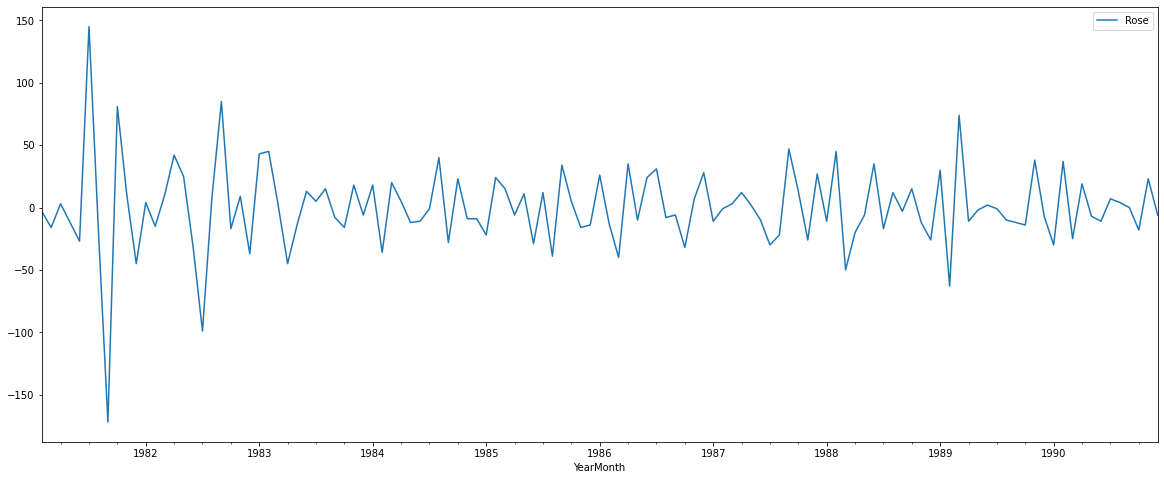

In [130]:
train.diff(12).dropna().diff().dropna().plot()

In [131]:
dftest=adfuller(train.diff(12).dropna().diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.632
DF test p-value is 0.02727765440096115
Number of lags used 11


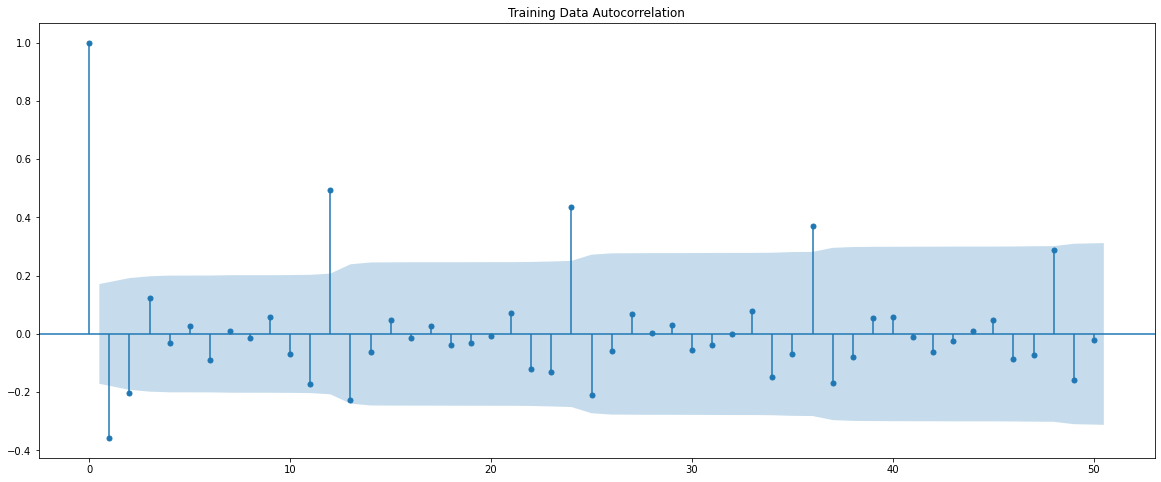

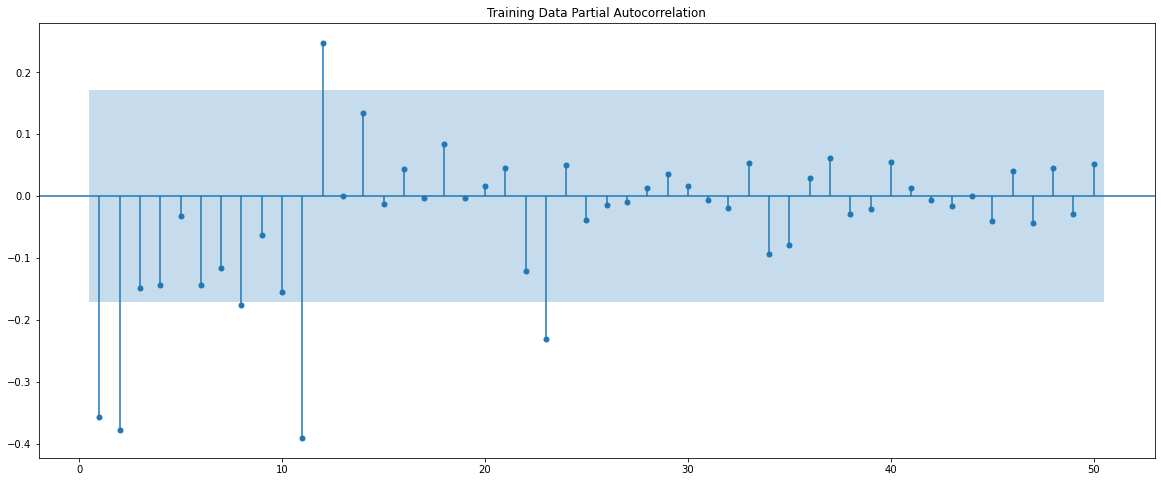

In [132]:
plot_acf(train.diff().dropna(),title='Training Data Autocorrelation',missing='drop',lags=50)
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle',lags=50);

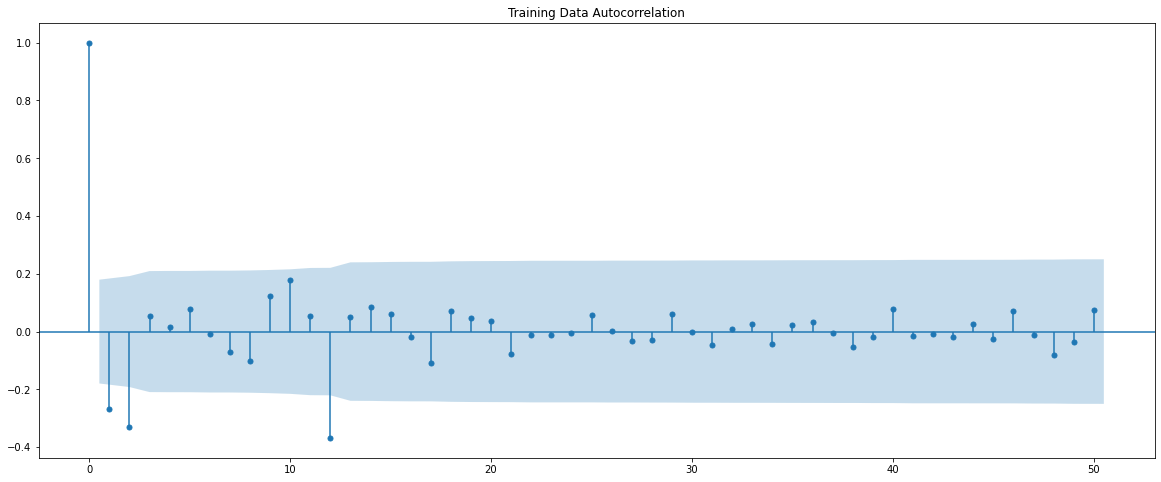

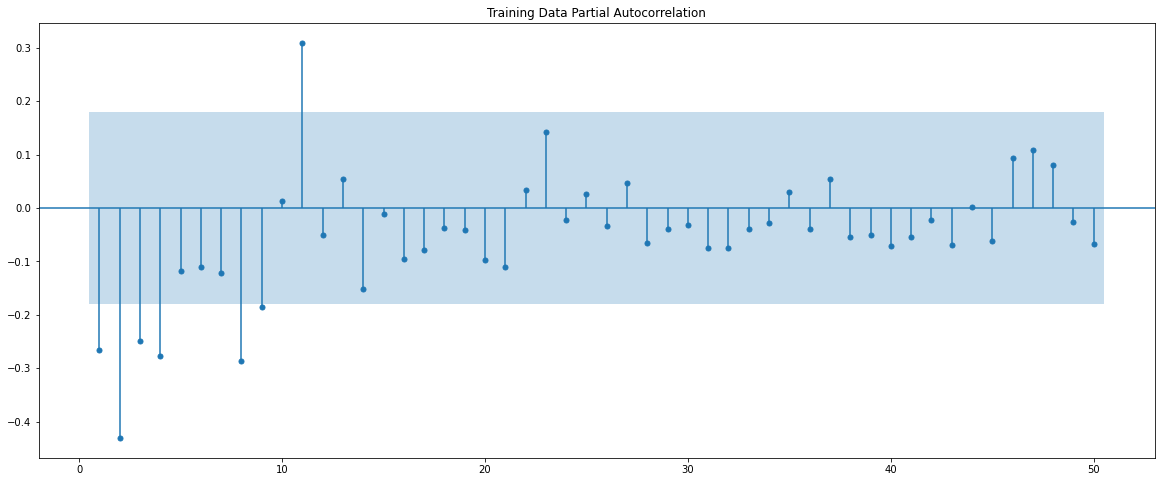

In [185]:
plot_acf(train.diff(12).dropna().diff().dropna(),title='Training Data Autocorrelation',missing='drop',lags=50)
plot_pacf(train.diff(12).dropna().diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle',lags=50);

In [186]:

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -284.473
Date:                            Sun, 19 Dec 2021   AIC                            590.945
Time:                                    14:30:15   BIC                            615.520
Sample:                                01-01-1980   HQIC                           600.695
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9797      0.225     -4.348      0.000      -1.421      -0.538
ar.L2         -0.1283      0.143   

D:\Softwares\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


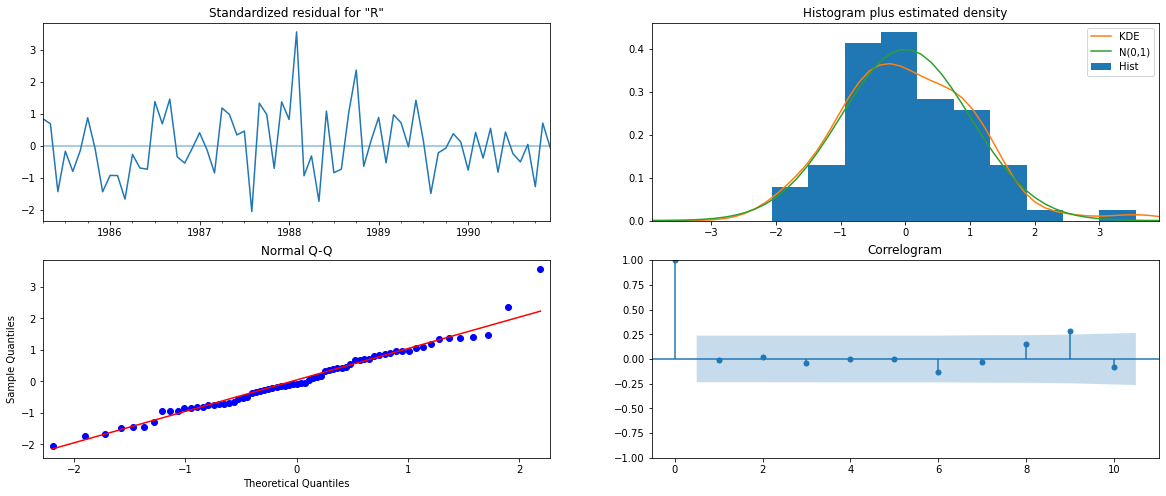

In [192]:
results_manual_SARIMA.plot_diagnostics();

In [277]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
print('RMSE for Manual Sarima model is :',mean_squared_error(predicted_manual_SARIMA.predicted_mean,test,squared=False))

rmse=mean_squared_error(predicted_manual_SARIMA.predicted_mean,test,squared=False)
sarima_models=pd.concat([sarima_models,pd.DataFrame({'RMSE':[rmse]},index=['SARIMAX(2, 1, 2)x(4, 1, 2, 12)'])])
sarima_models

results=pd.concat([results,pd.DataFrame({'RMSE':[rmse]},index=['SARIMAX(2, 1, 2)x(4, 1, 2, 12)'])])
results

RMSE for Manual Sarima model is : 17.398627295542404


,RMSE
Linear_Regression,15.291197
Naive,79.777253
Simple_Avg,53.520722
Trailing_2,11.530180
Trailing_3,14.129476
Trailing_4,14.462023
Trailing_5,14.490390
Trailing_6,14.586830
Trailing_7,15.077138
Simple_Exponential_Smoothing,36.857732


In [287]:
results.apply(lambda x : np.round(x,3))

,RMSE
Linear_Regression,15.291
Naive,79.777
Simple_Avg,53.521
Trailing_2,11.530
Trailing_3,14.129
Trailing_4,14.462
Trailing_5,14.490
Trailing_6,14.587
Trailing_7,15.077
Simple_Exponential_Smoothing,36.858


Text(0.5, 1.0, 'Manual Sarima model Predictions')

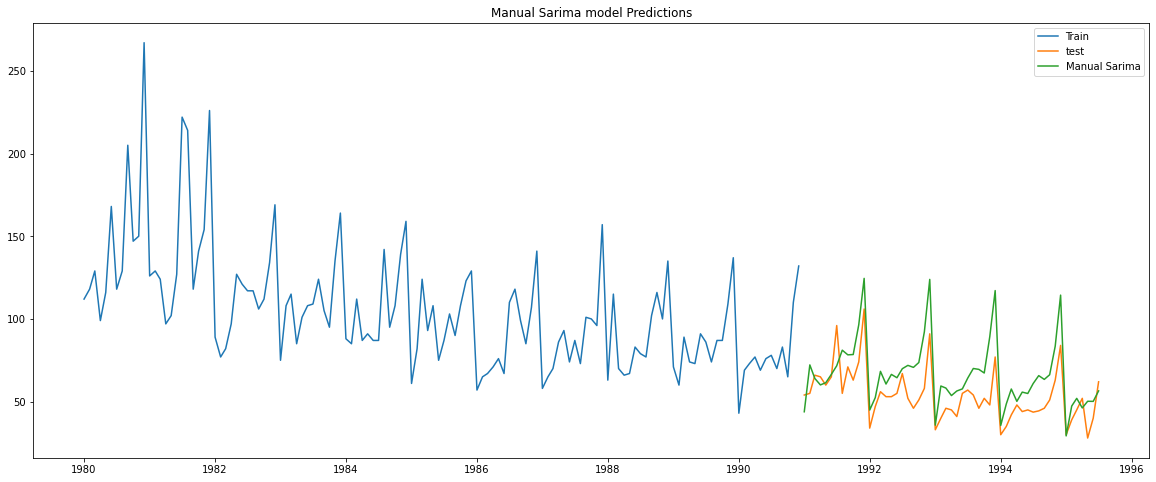

In [280]:
plt.plot(train,label='Train')
plt.plot(test,label='test')
plt.plot(predicted_manual_SARIMA.predicted_mean,label='Manual Sarima')
plt.legend()
plt.title('Manual Sarima model Predictions')

## Building a optimal model on the full dataset

In [289]:
full_data_model=ExponentialSmoothing(Rose,trend='additive',seasonal='additive',initialization_method='estimated').fit(optimized=True)
full_data_model.params

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.11674976576344961,
 'smoothing_trend': 0.007697984872331326,
 'smoothing_seasonal': 0.002325008724303977,
 'damping_trend': nan,
 'initial_level': 145.0548746102937,
 'initial_trend': -0.5588054020970299,
 'initial_seasons': array([-27.93918089, -17.19550997,  -9.15506252, -15.85226512,
        -11.94336894,  -5.96559795,   5.17778056,   5.22668176,
          2.65786075,   1.91698624,  17.07268287,  55.84915442]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [290]:
full_data_model.forecast(steps=12) 

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1995-08-01    50.790631
1995-09-01    47.721093
1995-10-01    46.477600
1995-11-01    61.126872
1995-12-01    99.395342
1996-01-01    15.107371
1996-02-01    25.350487
1996-03-01    32.887418
1996-04-01    25.690153
1996-05-01    29.089136
1996-06-01    34.563125
1996-07-01    45.170766
Freq: MS, dtype: float64

In [291]:
forecast=pd.DataFrame(full_data_model.forecast(steps=12) ,columns=['Forecast'])
forecast['ci_lower']=forecast['Forecast']- (1.96* full_data_model.resid.std())
forecast['ci_upper']=forecast['Forecast']+ (1.96* full_data_model.resid.std())
forecast


D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Forecast,ci_lower,ci_upper
1995-08-01,50.790631,15.902663,85.678599
1995-09-01,47.721093,12.833125,82.609061
1995-10-01,46.477600,11.589632,81.365568
1995-11-01,61.126872,26.238904,96.014839
1995-12-01,99.395342,64.507374,134.283310
1996-01-01,15.107371,-19.780597,49.995339
1996-02-01,25.350487,-9.537481,60.238455
1996-03-01,32.887418,-2.000550,67.775386
1996-04-01,25.690153,-9.197815,60.578121
1996-05-01,29.089136,-5.798832,63.977104


In [293]:
print('Rmse for the full dataset=',mean_squared_error(Rose['Rose'],full_data_model.fittedvalues,squared=False))

Rmse for the full dataset= 17.755281715024836


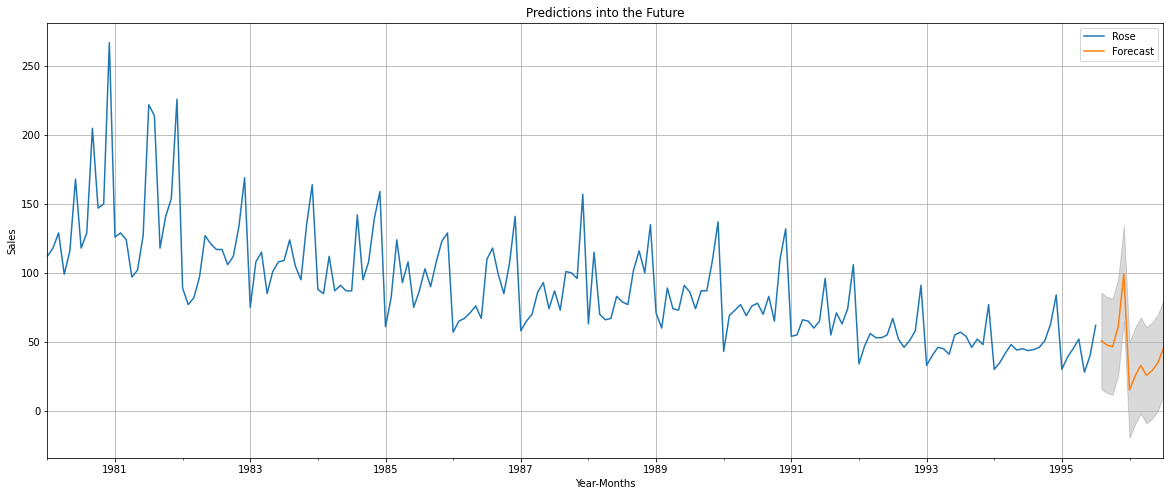

In [295]:
axis=Rose.plot(label='Observed')
forecast['Forecast'].plot(label='Forecast')
axis.fill_between(forecast.index,forecast['ci_lower'],
                 forecast['ci_upper'],color='k',alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('Predictions into the Future')
plt.legend()
plt.grid()